In [1]:
# Problem Statement
# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for
# crime data and identify the number of clusters formed and draw inferences.

In [26]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [3]:
data=pd.read_csv('crime_data.csv')

In [4]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
data.shape

(50, 5)

In [6]:
data.info()    # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
data[data.duplicated()]  # no duplicates

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [8]:
# Normalizing data
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
crime= norm_func(data.iloc[:,1:])
crime.head(5)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


## Hierarchical Clustering

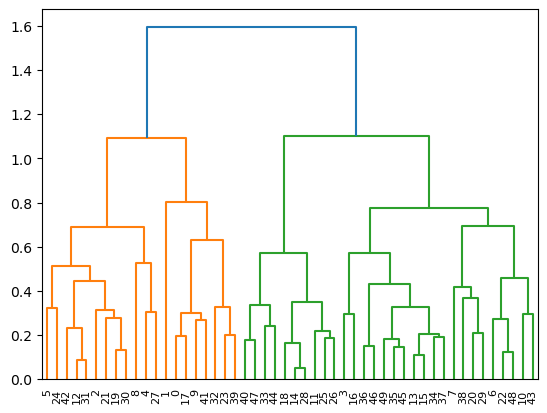

In [10]:
# creating dendrogram
dendrogram=sch.dendrogram(sch.linkage(crime,method='complete'))

In [11]:
# creating clusters
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')

In [12]:
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete')

In [13]:
hc.fit(crime)    # fitting

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete')

In [14]:
y_hc=hc.fit_predict(crime)    # predicting

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [15]:
data['hc_clusterid']=y_hc         # adding new column in dataset
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [16]:
data1=data.sort_values('hc_clusterid')    # sorting values

In [17]:
data1.iloc[:,[0,5]]

,Unnamed: 0,hc_clusterid
49,Wyoming,0
35,Oklahoma,0
29,New Jersey,0
28,New Hampshire,0
36,Oregon,0
26,Nebraska,0
25,Montana,0
48,Wisconsin,0
37,Pennsylvania,0
22,Minnesota,0


## KMeans

In [18]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime)
    wcss.append(kmeans.inertia_)

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

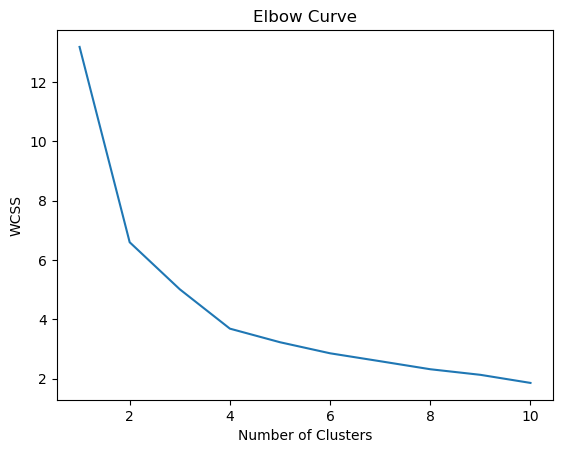

In [19]:
# elbow curve
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# from elbow curve it can be seen that n_clusters=2 will give best results

In [21]:
# building cluster algorithm
clusters_new=KMeans(2,random_state=42)
clusters_new.fit(crime)
clusters_new.labels_

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [22]:
# assigning clusters to dataset
data['kmeans_clusterid']=clusters_new.labels_

In [23]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc_clusterid,kmeans_clusterid
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,1,1


In [24]:
data.groupby('kmeans_clusterid').agg(['mean']).reset_index()

C:\Users\sycmy\AppData\Local\Temp\ipykernel_5716\2445014060.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('kmeans_clusterid').agg(['mean']).reset_index()


,kmeans_clusterid,Murder,Assault,UrbanPop,Rape,hc_clusterid
,,mean,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333,0.0
1,1,12.165,255.250000,68.400000,29.165000,1.0


In [25]:
data[data['kmeans_clusterid']==1]    # which data points are in cluster 1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc_clusterid,kmeans_clusterid
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,1,1
12,Illinois,10.4,249,83,24.0,1,1
17,Louisiana,15.4,249,66,22.2,1,1
19,Maryland,11.3,300,67,27.8,1,1


## DBSCAN

In [35]:
dbscan=DBSCAN(eps=0.2,min_samples=4)
dbscan.fit(crime)

DBSCAN(eps=0.2, min_samples=4)

In [36]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [37]:
x=pd.DataFrame(dbscan.labels_,columns=['DBSCAN_clusterid'])
x.head()

,DBSCAN_clusterid
0,-1
1,-1
2,-1
3,-1
4,-1


In [43]:
pd.concat([data,x],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc_clusterid,kmeans_clusterid,DBSCAN_clusterid
0,Alabama,13.2,236,58,21.2,1,1,-1
1,Alaska,10.0,263,48,44.5,1,1,-1
2,Arizona,8.1,294,80,31.0,1,1,-1
3,Arkansas,8.8,190,50,19.5,0,0,-1
4,California,9.0,276,91,40.6,1,1,-1
5,Colorado,7.9,204,78,38.7,1,1,-1
6,Connecticut,3.3,110,77,11.1,0,0,-1
7,Delaware,5.9,238,72,15.8,0,0,-1
8,Florida,15.4,335,80,31.9,1,1,-1
9,Georgia,17.4,211,60,25.8,1,1,-1
